In [107]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

Load data set for global land tempratures based on country.

In [101]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [102]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))

In [132]:
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Check if any data is null

In [105]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

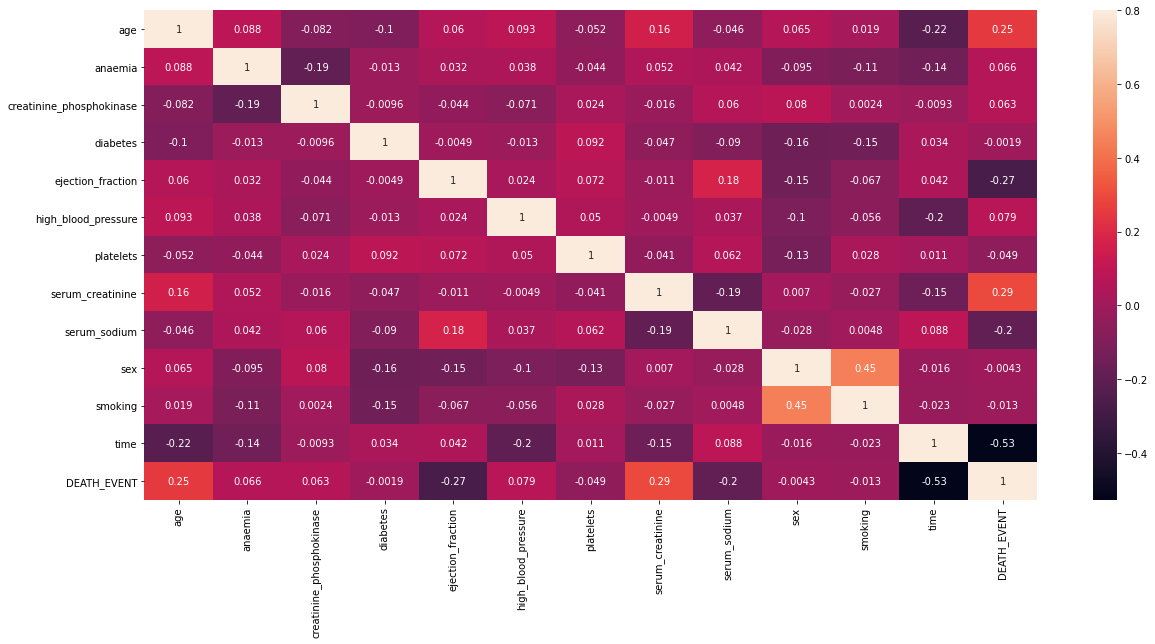

In [183]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_matrix, vmax=.8, annot=True);


Using Age, Diabetes, Platelets, and Smoking's correlation vs Death Event

In [194]:
x = df.iloc[:, [0,3,7,11]].values  
y = df.iloc[:,-1].values

Setting test size at 20% and split data for training and testing purposes.

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

Normalize data to have mean of 0 stdv of 1

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

KNN From 3 to 10 Neighbors

In [225]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

for neighbors in range(3,10):
    model = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Neighbors: ",neighbors, " Accuracry Score: ", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(conf_matrix,'\n')

Neighbors:  3  Accuracry Score:  0.8166666666666667
Confusion Matrix:
[[34  3]
 [ 8 15]] 

Neighbors:  4  Accuracry Score:  0.8
Confusion Matrix:
[[36  1]
 [11 12]] 

Neighbors:  5  Accuracry Score:  0.8333333333333334
Confusion Matrix:
[[35  2]
 [ 8 15]] 

Neighbors:  6  Accuracry Score:  0.8166666666666667
Confusion Matrix:
[[36  1]
 [10 13]] 

Neighbors:  7  Accuracry Score:  0.8333333333333334
Confusion Matrix:
[[35  2]
 [ 8 15]] 

Neighbors:  8  Accuracry Score:  0.8
Confusion Matrix:
[[36  1]
 [11 12]] 

Neighbors:  9  Accuracry Score:  0.8333333333333334
Confusion Matrix:
[[36  1]
 [ 9 14]] 



SVC accuracy using the C scores from 0.6 - 1.0 with 0.1 difference

In [224]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

print('SVC Accuracy Scores based on C ')

for c in [0.6,0.7,0.8,0.9,1.0]:
    model = SVC(C = c, random_state=0, kernel = 'rbf')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('C = ', accuracy_score(y_test,y_pred))
    print("Confusion Matrix:")
    print(conf_matrix,'\n')

SVC Accuracy Scores based on C
C =  0.8333333333333334
Confusion Matrix:
[[36  1]
 [ 9 14]] 

C =  0.8333333333333334
Confusion Matrix:
[[36  1]
 [ 9 14]] 

C =  0.8166666666666667
Confusion Matrix:
[[35  2]
 [ 9 14]] 

C =  0.8166666666666667
Confusion Matrix:
[[35  2]
 [ 9 14]] 

C =  0.8166666666666667
Confusion Matrix:
[[35  2]
 [ 9 14]] 

C =  0.8166666666666667
Confusion Matrix:
[[35  2]
 [ 9 14]] 

